In [1]:
import numpy as np
from ase.lattice.hexagonal import Graphite
from fireballpy import Fireball
from fireballpy.bands import BandPath

### FOR SPEED ###
initial_charges = np.array([
       [1.34072873, 2.61764878],
       [0.99340305, 3.01348257],
       [1.13885003, 2.91582056],
       [1.13893643, 2.92344519],
       [1.32523317, 2.68713625],
       [1.11192312, 2.91089948],
       [0.99559985, 3.01516746],
       [1.3392901 , 2.54003605],
       [1.11243218, 2.91501286],
       [1.32590392, 2.67975053],
       [1.34151543, 2.52458449],
       [0.99542361, 3.01974202],
       [0.99247898, 3.01465425],
       [1.34048409, 2.60988278],
       [1.13893912, 2.91875962],
       [1.1388882 , 2.92433614],
       [1.33969117, 2.62195892],
       [0.99419142, 3.01267971],
       [1.13905367, 2.91787857],
       [1.13919331, 2.92182631],
       [1.32506108, 2.68941399],
       [1.11188484, 2.90913254],
       [0.99543606, 3.01569721],
       [1.34003412, 2.53528219],
       [1.11242161, 2.91542083],
       [1.32639636, 2.67597502],
       [1.34124331, 2.52714228],
       [0.99548409, 3.01840843],
       [0.99317385, 3.01674756],
       [1.33939607, 2.60828518],
       [1.13925737, 2.92033815],
       [1.1391268 , 2.92237898],
])
#################

atoms = Graphite(symbol='C', latticeconstant={'a': 2.46,'c': 6.70}, size=(2,2,2))
atoms.calc = Fireball('biology', kpts=5.0, initial_charges=initial_charges)
atoms.get_potential_energy()

np.float64(-4889.320592794676)

In [2]:
bp = BandPath(atoms=atoms, path='GMKGALHA,LM,KH', npoints=200)

<Axes: ylabel='Energy [eV]'>

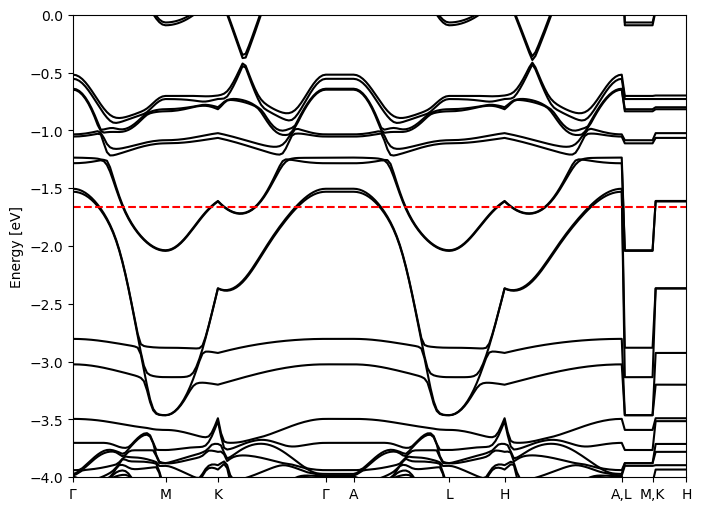

In [3]:
bp.plot(emin=-4, emax=0)

<Axes: ylabel='E - E${}_F$ [eV]'>

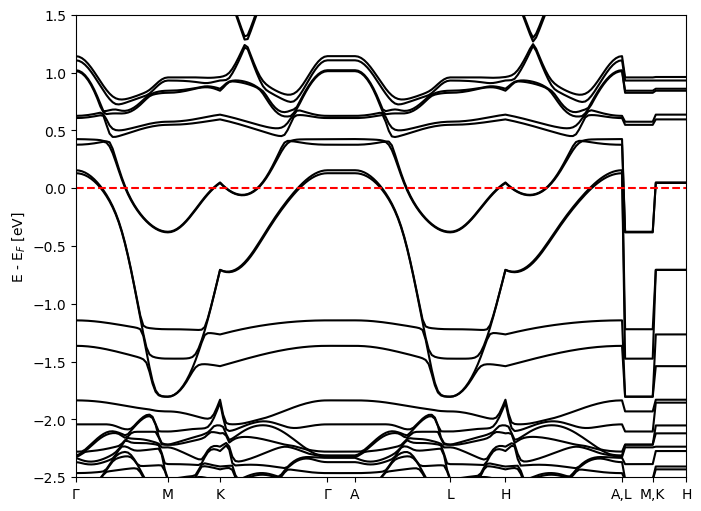

In [4]:
bp.plot(emin=-2.5, emax=1.5, center=True)